In [80]:
#IMPORTS
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
load_dotenv()

True

In [81]:
#ENVS
host=os.getenv("CASE_HOST")
user=os.getenv("CASE_USER")
password=os.getenv("CASE_PASSWORD")
database=os.getenv("CASE_DATABASE")
port=os.getenv("CASE_PORT")

In [82]:
#GET DATA
DATABASE_URL = f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(DATABASE_URL)
query = '''
select 
tb1.appId, 
tb1.date,
tb1.mauReal as monthly_active_users,
tb2.country,
tb2.lang,
tb2.predictionLoss,
tb3.newinstalls,
tb4.category,
tb4.ratings as total_ratings,
tb4.daily_ratings,
tb4.reviews,
tb4.daily_reviews, 
tb1.dauReal as daily_active_users_TARGET

from daumau tb1

left join desinstalacoes as tb2 
    on tb1.appId = tb2.appId and tb1.date = tb2.date 

left join installs as tb3 
    on tb1.appId = tb3.appId and tb1.date = tb3.date

left join ratings_reviews as tb4 
    on tb1.appId = tb4.appId and tb1.date = tb4.date;
'''
df = pd.read_sql(query, con=engine)


In [83]:
df.head()

,appId,date,monthly_active_users,country,lang,predictionLoss,newinstalls,category,total_ratings,daily_ratings,reviews,daily_reviews,daily_active_users_TARGET
0,com.app.33540,2024-01-01,3643110.0,br,pt,8170.0,8068.0,FINANCE,223848.0,297.0,82172.0,46.0,393961.0
1,com.app.31679,2024-01-01,1349262.0,br,pt,4287.0,2160.0,FINANCE,277813.0,132.0,139907.0,19.0,157532.0
2,com.app.77385,2024-01-01,1934660.0,br,pt,4497.0,3136.0,FINANCE,197329.0,187.0,79637.0,25.0,239768.0
3,com.app.41189,2024-01-01,19039746.0,br,pt,45759.0,13830.0,FINANCE,3499378.0,766.0,952285.0,171.0,4954347.0
4,com.app.71740,2024-01-01,34421.0,br,pt,1463.0,100.0,FINANCE,8327.0,1.0,4351.0,1.0,2809.0


In [84]:
df.shape

(41437, 13)

## Duplicados e valores ausentes

Duplicados


In [86]:
numero_duplicadas = df.duplicated().sum()
print('O numero de linhas duplicadas é:', numero_duplicadas)

O numero de linhas duplicadas é: 291


Ausentes

In [87]:
qtd_alguma_linha_com_nulo = df.isnull().any(axis=1).sum()
qtd_todos_nulos = df.isnull().all(axis=1).sum() 

ex_alguma_linha_com_nulo = df[df.isnull().any(axis=1)]
ex_todos_nulos = df[df.isnull().all(axis=1)]

print('O numero de linhas onde TODOS os valores estão nulos é:', qtd_todos_nulos)
print('EXEMPLOS:')
ex_todos_nulos
print(' ')
print(' ')
print('O numero de linhas onde PELO MENOS ALGUM valor está nulo é:', qtd_alguma_linha_com_nulo)
print('EXEMPLOS:')
ex_alguma_linha_com_nulo.sample(10)

O numero de linhas onde TODOS os valores estão nulos é: 0
EXEMPLOS:
 
 
O numero de linhas onde PELO MENOS ALGUM valor está nulo é: 2990
EXEMPLOS:


,appId,date,monthly_active_users,country,lang,predictionLoss,newinstalls,category,total_ratings,daily_ratings,reviews,daily_reviews,daily_active_users_TARGET
29822,None,2044-07-05,19685101.0,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,8227357.0
11888,com.app.26790,2024-08-10,29431.0,br,pt,1394.0,NaN,None,NaN,NaN,NaN,NaN,1272.0
26033,com.app.60027,2024-02-25,1117352.0,br,pt,1323.0,NaN,None,NaN,NaN,NaN,NaN,1174.0
11306,com.app.44541,2024-06-03,18522.0,br,pt,1768.0,NaN,None,NaN,NaN,NaN,NaN,886.0
40915,None,2220-07-22,123719.0,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,11641.0
20922,com.app.98438,2024-03-26,97819.0,br,pt,1777.0,NaN,None,NaN,NaN,NaN,NaN,10694.0
21140,com.app.19637,2024-06-08,16132.0,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,1803.0
10286,com.app.88509,2024-06-17,24326347.0,br,pt,28041.0,NaN,OTHERS,1014029.0,377.0,521824.0,152.0,4289861.0
32046,com.app.26790,2024-03-22,65042.0,br,pt,1777.0,NaN,None,NaN,NaN,NaN,NaN,2978.0
19350,com.app.98438,2024-04-09,98472.0,br,pt,1777.0,NaN,None,NaN,NaN,NaN,NaN,13876.0


In [88]:
df.shape[0]

41437

In [89]:
total_pct_missing = ((qtd_alguma_linha_com_nulo * 100) / df.shape[0])
print('Percentual de linhas com algum valor ausente: ',  round(total_pct_missing),'% ') 

Percentual de linhas com algum valor ausente:  7 % 


- Até o momento, vimos que temos linhas duplicadas e linhas com valores ausentes <br><br>
- O ideal é que nenhum dado seja apagado da base à priori. Precisamos compreender se a falta de valores e dados duplicados são um erro de processamento ou um comportamento esperado. <br><br>
- No caso onde os dados estão duplicados em TODAS as colunas, (salvo os casos onde os apps seriam medidos mais de uma vez ao dia e nesse caso, deveria ter algo para diferenciar as linhas) em geral é correto remover pois de fato seria um erro de armazenamento. <br><br>
- E no caso de dados ausentes, podemos usar abordagens como a imputação de valores utilizando medidas de tendência central (como média, mediana e moda) ou mesmo modelos de machine learning.<br><br>
- Porém, para um modelo inicial E/OU caso a quantidade de amostras com valores ausentes seja baixa (menos de 10%), podemos removê-los visto que esta perda não terá uma influência considerável nos resultados do modelo.  

In [90]:
df.drop_duplicates(inplace=True)
df_limpo = df.dropna()
df_limpo.shape

(38159, 13)

## Verificando demais inconsistências

In [ ]:
df_limpo.head()

,appId,date,monthly_active_users,country,lang,predictionLoss,newinstalls,category,total_ratings,daily_ratings,reviews,daily_reviews,daily_active_users_TARGET
0,com.app.33540,2024-01-01,3643110.0,br,pt,8170.0,8068.0,FINANCE,223848.0,297.0,82172.0,46.0,393961.0
1,com.app.31679,2024-01-01,1349262.0,br,pt,4287.0,2160.0,FINANCE,277813.0,132.0,139907.0,19.0,157532.0
2,com.app.77385,2024-01-01,1934660.0,br,pt,4497.0,3136.0,FINANCE,197329.0,187.0,79637.0,25.0,239768.0
3,com.app.41189,2024-01-01,19039746.0,br,pt,45759.0,13830.0,FINANCE,3499378.0,766.0,952285.0,171.0,4954347.0
4,com.app.71740,2024-01-01,34421.0,br,pt,1463.0,100.0,FINANCE,8327.0,1.0,4351.0,1.0,2809.0


### Data

In [ ]:
df_limpo.loc[:, 'date'] = pd.to_datetime(df_limpo['date'])

Como não houve erro ao transformar a coluna de data para o formato data/hora, a principio todos estão no mesmo formato.

In [74]:
df_limpo.sort_values(by='date', ascending=True).head()

,appId,date,monthly_active_users,country,lang,predictionLoss,newinstalls,category,total_ratings,daily_ratings,reviews,daily_reviews,daily_active_users_TARGET
0,com.app.33540,2024-01-01 00:00:00,3643110.0,br,pt,8170.0,8068.0,FINANCE,223848.0,297.0,82172.0,46.0,393961.0
102,com.app.85231,2024-01-01 00:00:00,73394.0,br,pt,1718.0,443.0,FINANCE,36486.0,0.0,21539.0,2.0,8888.0
101,com.app.14811,2024-01-01 00:00:00,107133.0,br,pt,1166.0,966.0,FINANCE,8363.0,0.0,4708.0,0.0,11466.0
100,com.app.78155,2024-01-01 00:00:00,78342.0,br,pt,1386.0,250.0,FINANCE,11125.0,1.0,6798.0,0.0,10171.0
99,com.app.85803,2024-01-01 00:00:00,61716.0,br,pt,885.0,115.0,BUSINESS,3146.0,1.0,851.0,2.0,2874.0


Nenhuma data muito mais antiga que as outras

In [75]:
df_limpo.sort_values(by='date', ascending=False).head()

,appId,date,monthly_active_users,country,lang,predictionLoss,newinstalls,category,total_ratings,daily_ratings,reviews,daily_reviews,daily_active_users_TARGET
21361,com.app.39058,2024-09-30 00:00:00,117412.0,br,pt,1837.0,278.0,FINANCE,2595.0,8.0,1203.0,4.0,16980.0
38745,com.app.61743,2024-09-30 00:00:00,435912.0,br,pt,4852.0,893.0,SHOPPING,222322.0,69.0,49241.0,8.0,54112.0
17444,com.app.47280,2024-09-30 00:00:00,22010852.0,br,pt,68278.0,15607.0,FINANCE,6861979.0,3091.0,1491128.0,118.0,9592215.0
28023,com.app.78794,2024-09-30 00:00:00,23935675.0,br,pt,121813.0,59608.0,FINANCE,2243615.0,210.0,1012254.0,96.0,7895595.0
38128,com.app.88484,2024-09-30 00:00:00,11818043.0,br,pt,71271.0,22938.0,SHOPPING,2023648.0,357.0,698826.0,45.0,2400838.0


Nenhuma data muito futura às outras

### monthly_active_users

In [97]:
df_limpo[['appId', 'date', 'monthly_active_users']].sort_values(by='monthly_active_users', ascending=False).head()

,appId,date,monthly_active_users
85,com.app.23305,2024-01-01,29605840.0
1858,com.app.23305,2024-01-02,29563763.0
2093,com.app.23305,2024-01-03,29485494.0
201,com.app.23305,2024-01-04,29379600.0
2071,com.app.23305,2024-01-05,29311213.0


In [98]:
df_limpo[['appId', 'date', 'monthly_active_users']].sort_values(by='monthly_active_users', ascending=True).head()

,appId,date,monthly_active_users
27008,com.app.96037,2024-04-15,766.0
1325,com.app.95733,2024-01-09,813.0
1674,com.app.95733,2024-01-10,877.0
552,com.app.95733,2024-01-11,1087.0
553,com.app.95733,2024-01-12,1249.0


<Axes: >

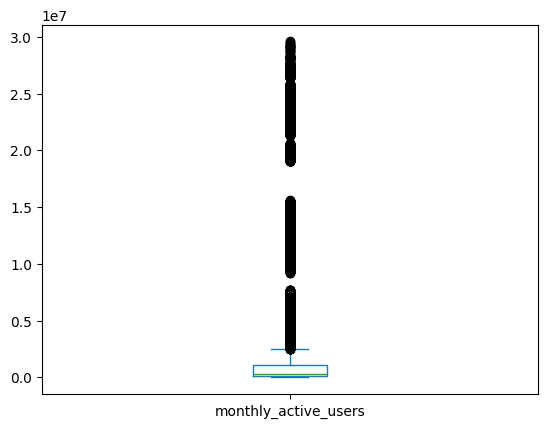

In [91]:
df_limpo['monthly_active_users'].plot(kind='box')

Aparentemente, nenhum dado que esteja extremamente isolado

### predictionLoss

In [101]:
df_limpo[['appId', 'date', 'predictionLoss']].sort_values(by='predictionLoss', ascending=False).head()

,appId,date,predictionLoss
33768,com.app.78794,2024-04-05,189683.0
22731,com.app.78794,2024-03-22,177069.0
18150,com.app.78794,2024-01-29,171682.0
18519,com.app.78794,2024-05-03,171174.0
23592,com.app.78794,2024-03-28,170588.0


In [102]:
df_limpo[['appId', 'date', 'predictionLoss']].sort_values(by='predictionLoss', ascending=True).head()

,appId,date,predictionLoss
16959,com.app.66274,2024-02-10,455.0
5020,com.app.66274,2024-03-31,472.0
4752,com.app.66274,2024-01-21,487.0
35266,com.app.66274,2024-04-02,513.0
31469,com.app.66274,2024-04-01,514.0


<Axes: >

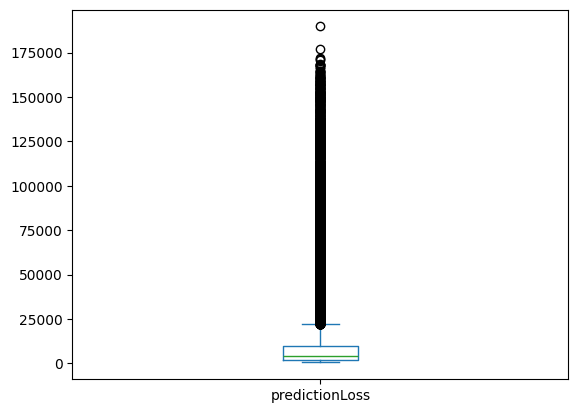

In [103]:
df_limpo['predictionLoss'].plot(kind='box')

Existem dados isolados, mas ainda sim, aparentemente normais.

### newinstalls

In [104]:
df_limpo[['appId', 'date', 'newinstalls']].sort_values(by='newinstalls', ascending=False).head()

,appId,date,newinstalls
9976,com.app.35190,2024-03-30,71825.0
3949,com.app.78794,2024-08-29,70241.0
41259,com.app.78794,2024-07-01,69082.0
33359,com.app.78794,2024-05-31,68658.0
9651,com.app.78794,2024-04-29,68640.0


In [105]:
df_limpo[['appId', 'date', 'newinstalls']].sort_values(by='newinstalls', ascending=True).head()

,appId,date,newinstalls
17,com.app.96938,2024-01-01,0.0
22556,com.app.96938,2024-08-04,0.0
39866,com.app.96938,2024-02-04,0.0
22519,com.app.68942,2024-08-03,0.0
28110,com.app.96938,2024-04-16,0.0


<Axes: >

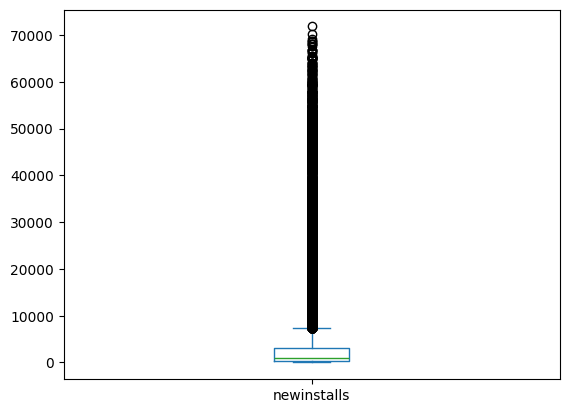

In [106]:
df_limpo['newinstalls'].plot(kind='box')

Aparentemente, nenhum dado que esteja extremamente isolado

### total_ratings

In [107]:
df_limpo[['appId', 'date', 'total_ratings']].sort_values(by='total_ratings', ascending=False).head()

,appId,date,total_ratings
30501,com.app.28498,2024-04-09,13214326.0
41249,com.app.28498,2024-04-08,13213903.0
17444,com.app.47280,2024-09-30,6861979.0
19664,com.app.47280,2024-09-29,6861056.0
31556,com.app.47280,2024-09-28,6859565.0


In [108]:
df_limpo[['appId', 'date', 'total_ratings']].sort_values(by='total_ratings', ascending=True).head()

,appId,date,total_ratings
13686,com.app.23000,2024-02-29,19.0
6115,com.app.23000,2024-02-28,19.0
32921,com.app.23000,2024-03-02,20.0
32177,com.app.23000,2024-03-01,20.0
41005,com.app.23000,2024-03-06,21.0


<Axes: >

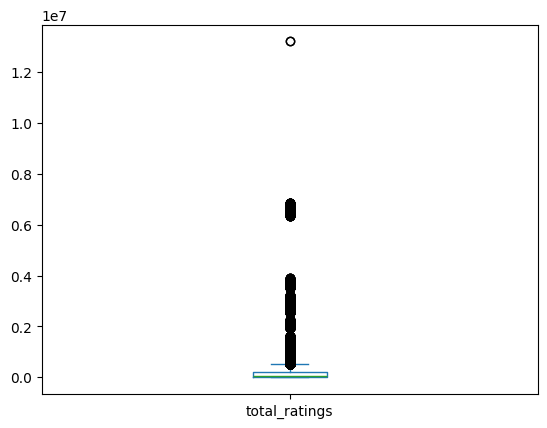

In [109]:
df_limpo['total_ratings'].plot(kind='box')

Aqui existem dados extremamente isolados, o ideal seria conferir com o time de engenharia se está correto mesmo.

### daily_ratings

In [110]:
df_limpo[['appId', 'date', 'daily_ratings']].sort_values(by='daily_ratings', ascending=False).head()

,appId,date,daily_ratings
7645,com.app.41189,2024-08-23,6353.0
8915,com.app.41189,2024-08-26,5741.0
37020,com.app.41189,2024-09-06,5446.0
5273,com.app.41189,2024-08-30,5437.0
1919,com.app.41189,2024-01-05,5297.0


In [114]:
df_limpo[['appId', 'date', 'daily_ratings']].sort_values(by='daily_ratings', ascending=True).head(10)

,appId,date,daily_ratings
17424,com.app.78794,2024-04-16,-86.0
7529,com.app.78794,2024-04-15,-83.0
39886,com.app.78794,2024-04-14,-75.0
18151,com.app.59849,2024-01-16,-74.0
4742,com.app.59849,2024-01-17,-73.0
976,com.app.59849,2024-01-15,-73.0
36140,com.app.59849,2024-01-18,-72.0
1495,com.app.59849,2024-01-14,-70.0
31598,com.app.59849,2024-01-19,-70.0
12348,com.app.59849,2024-01-20,-69.0


In [115]:
df_teste = df_limpo[['appId', 'date', 'daily_ratings']]
menor_que_zero = df_teste[df_teste['daily_ratings'] < 0]
menor_que_zero.shape

(409, 3)

In [117]:
menor_que_zero.sample(7)

,appId,date,daily_ratings
34938,com.app.60633,2024-03-22,-1.0
22764,com.app.80525,2024-02-28,-7.0
18329,com.app.80525,2024-05-07,-8.0
34793,com.app.80525,2024-09-26,-7.0
321,com.app.80525,2024-01-06,-3.0
38156,com.app.60633,2024-09-07,-2.0
29069,com.app.59849,2024-01-21,-66.0


<Axes: >

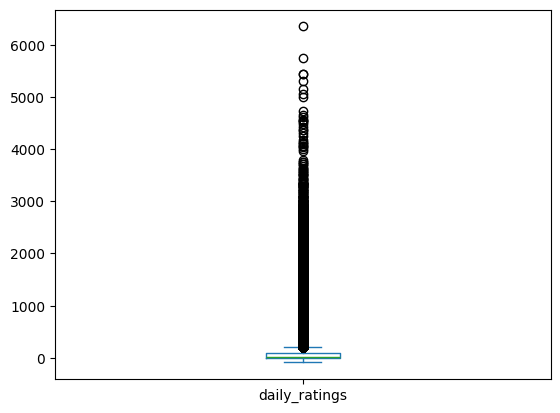

In [118]:
df_limpo['daily_ratings'].plot(kind='box')

Essa variável pela lógica não deveria receber dados negativos. Seria importante entender o motivo de 409 amostras estarem desta forma

### reviews

In [119]:
df_limpo[['appId', 'date', 'reviews']].sort_values(by='reviews', ascending=False).head()

,appId,date,reviews
17444,com.app.47280,2024-09-30,1491128.0
19664,com.app.47280,2024-09-29,1491013.0
31556,com.app.47280,2024-09-28,1490981.0
24748,com.app.47280,2024-09-27,1490906.0
22138,com.app.47280,2024-09-26,1490814.0


In [120]:
df_limpo[['appId', 'date', 'reviews']].sort_values(by='reviews', ascending=True).head()

,appId,date,reviews
32177,com.app.23000,2024-03-01,11.0
13686,com.app.23000,2024-02-29,11.0
6115,com.app.23000,2024-02-28,11.0
32921,com.app.23000,2024-03-02,12.0
14999,com.app.23000,2024-03-05,12.0


<Axes: >

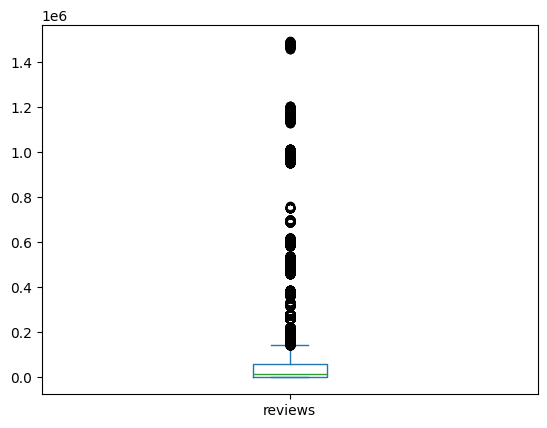

In [121]:
df_limpo['reviews'].plot(kind='box')

Aparentemente, um comportamento normal.

### daily_reviews

In [122]:
df_limpo[['appId', 'date', 'daily_reviews']].sort_values(by='daily_reviews', ascending=False).head()

,appId,date,daily_reviews
14096,com.app.78794,2024-04-18,1808.0
29952,com.app.78794,2024-05-28,923.0
1776,com.app.19544,2024-01-03,777.0
794,com.app.19544,2024-01-04,775.0
6229,com.app.78794,2024-04-21,767.0


In [123]:
df_limpo[['appId', 'date', 'daily_reviews']].sort_values(by='daily_reviews', ascending=True).head()

,appId,date,daily_reviews
39886,com.app.78794,2024-04-14,-75.0
7529,com.app.78794,2024-04-15,-74.0
4302,com.app.78794,2024-04-13,-74.0
30495,com.app.78794,2024-04-12,-68.0
18151,com.app.59849,2024-01-16,-62.0


<Axes: >

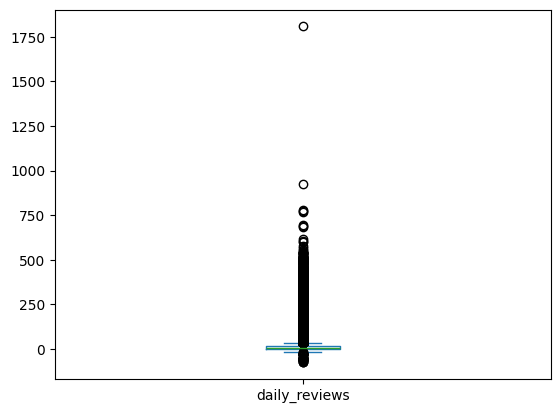

In [124]:
df_limpo['daily_reviews'].plot(kind='box')

- Existe um dado extremo, mas dentro da escala de valores, é aparentemente aceitavel.<br>
- Existem valores negativos também. Necessário conferir o motivo.

### daily_active_users_TARGET

In [125]:
df_limpo[['appId', 'date', 'daily_active_users_TARGET']].sort_values(by='daily_active_users_TARGET', ascending=False).head()

,appId,date,daily_active_users_TARGET
24823,com.app.47280,2024-04-05,10648152.0
35544,com.app.47280,2024-07-05,10547548.0
33556,com.app.47280,2024-09-06,10486370.0
2657,com.app.47280,2024-05-07,10329011.0
23265,com.app.47280,2024-06-06,10269678.0


In [126]:
df_limpo[['appId', 'date', 'daily_active_users_TARGET']].sort_values(by='daily_active_users_TARGET', ascending=True).head()

,appId,date,daily_active_users_TARGET
5982,com.app.48916,2024-03-04,750.0
34581,com.app.79907,2024-07-28,751.0
16577,com.app.48916,2024-07-07,751.0
39706,com.app.79907,2024-08-15,753.0
12120,com.app.48916,2024-02-29,753.0


<Axes: >

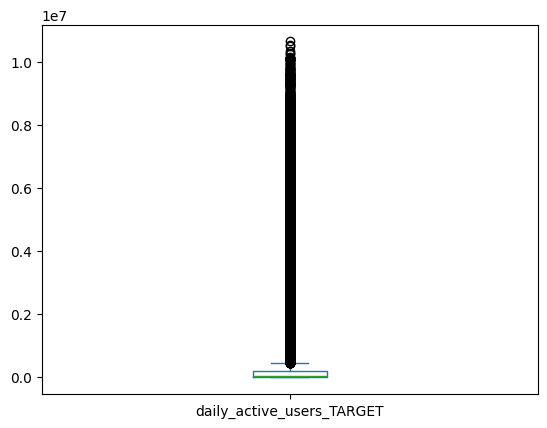

In [127]:
df_limpo['daily_active_users_TARGET'].plot(kind='box')

Aparentemente, nenhum dado que esteja extremamente isolado.

### Variáveis categóricas

In [92]:
df_limpo['country'].value_counts()

country
br    38159
Name: count, dtype: int64

In [93]:
df_limpo['lang'].value_counts()

lang
pt    38159
Name: count, dtype: int64

In [94]:
df_limpo['category'].value_counts()

category
FINANCE             15164
OTHERS               9019
SHOPPING             6799
BUSINESS             3535
TRAVEL_AND_LOCAL     2510
FOOD_AND_DRINK       1132
Name: count, dtype: int64

,appId,date,predictionLoss
33768,com.app.78794,2024-04-05,189683.0
22731,com.app.78794,2024-03-22,177069.0
18150,com.app.78794,2024-01-29,171682.0
18519,com.app.78794,2024-05-03,171174.0
23592,com.app.78794,2024-03-28,170588.0


In [100]:
df_limpo[['appId', 'date', 'predictionLoss']].sort_values(by='predictionLoss', ascending=True).head()

,appId,date,predictionLoss
16959,com.app.66274,2024-02-10,455.0
5020,com.app.66274,2024-03-31,472.0
4752,com.app.66274,2024-01-21,487.0
35266,com.app.66274,2024-04-02,513.0
31469,com.app.66274,2024-04-01,514.0


### Ajustando inconsistências encontradas

- Nas colunas "daily_reviews" e "daily_ratings" existem valores negativos. Considerando que não há a possibilidade de existir a quantidade negativa de um evento em um dia (no mínimo 0), vamos transformar esses valores para positivo.<br><br>
- Lembrando que essa ação deve ser feita somente após a verificação com o time de engenharia.

In [132]:
df_limpo.loc[:, 'daily_reviews'] = df_limpo['daily_reviews'].abs()
df_limpo.loc[:, 'daily_ratings'] = df_limpo['daily_ratings'].abs()

In [135]:
df_limpo[['appId', 'date', 'daily_reviews']].sort_values(by='daily_reviews', ascending=True).head()

,appId,date,daily_reviews
41402,com.app.69241,2024-02-05,0.0
26,com.app.31454,2024-01-01,0.0
25,com.app.53788,2024-01-01,0.0
24958,com.app.20651,2024-05-04,0.0
24988,com.app.60770,2024-03-21,0.0


In [136]:
df_limpo[['appId', 'date', 'daily_ratings']].sort_values(by='daily_ratings', ascending=True).head()

,appId,date,daily_ratings
10379,com.app.78155,2024-03-02,0.0
34807,com.app.93131,2024-04-27,0.0
34797,com.app.69241,2024-02-14,0.0
10365,com.app.47938,2024-07-05,0.0
10364,com.app.89044,2024-06-30,0.0


### Exportando csv

In [137]:
df_limpo.head()

,appId,date,monthly_active_users,country,lang,predictionLoss,newinstalls,category,total_ratings,daily_ratings,reviews,daily_reviews,daily_active_users_TARGET
0,com.app.33540,2024-01-01,3643110.0,br,pt,8170.0,8068.0,FINANCE,223848.0,297.0,82172.0,46.0,393961.0
1,com.app.31679,2024-01-01,1349262.0,br,pt,4287.0,2160.0,FINANCE,277813.0,132.0,139907.0,19.0,157532.0
2,com.app.77385,2024-01-01,1934660.0,br,pt,4497.0,3136.0,FINANCE,197329.0,187.0,79637.0,25.0,239768.0
3,com.app.41189,2024-01-01,19039746.0,br,pt,45759.0,13830.0,FINANCE,3499378.0,766.0,952285.0,171.0,4954347.0
4,com.app.71740,2024-01-01,34421.0,br,pt,1463.0,100.0,FINANCE,8327.0,1.0,4351.0,1.0,2809.0


In [140]:
df_limpo.to_csv('../data/dados_limpos.csv', index=False)